In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression # Import LogisticRegression
from sklearn.metrics import classification_report # Import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score # Import necessary metrics
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Lab 10


In [ ]:
# Instructions:
# a. Load Dataset 'cancer_coded.csv'
# b. You need to drop the 'Sample code number' from the dataset as this does not contribute to the prediction (data cleaning)
# c. Insert a validation data at the end of the dataframe
#   [5, 9, 9, 3, 7, 3, 8, 9, 2, -1]
#   [3, 2, 1, 1, 2, 3, 1, 1, 1, -1]
# d. Use StandardScaler to normalize the dataset
# e. Remove the validation data from the dataset before training
# f. Train/Test Split is test_size = 0.2, random_state = 101

In [ ]:
# a. Load Dataset 'cancer_coded.csv'
dataset = pd.read_csv('https://raw.githubusercontent.com/renatomaaliw3/public_files/refs/heads/master/Data%20Sets/cancer_coded.csv', encoding='ISO-8859-1')
dataset.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,0
1,1002945,5,4,4,5,7,10,3,2,1,0
2,1015425,3,1,1,1,2,2,3,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,0
4,1017023,4,1,1,3,2,1,3,1,1,0


In [ ]:
# b. You need to drop the 'Sample code number' from the dataset as this does not contribute to the prediction (data cleaning)
dataset_cleaned = dataset.drop('Sample code number', axis=1)
dataset_cleaned.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


In [ ]:
#c. Insert a validation data at the end of the dataframe
#   [5, 9, 9, 3, 7, 3, 8, 9, 2, -1]
#   [3, 2, 1, 1, 2, 3, 1, 1, 1, -1]

validation_data_raw = [
    [5, 9, 9, 3, 7, 3, 8, 9, 2, -1],
    [3, 2, 1, 1, 2, 3, 1, 1, 1, -1]
]
validation_df_raw = pd.DataFrame(validation_data_raw, columns = dataset_cleaned.columns)
df_final_raw = pd.concat([dataset_cleaned, validation_df_raw], ignore_index=True)


In [ ]:
# d. Use StandardScaler to normalize the dataset
features = df_final_raw.drop('Class', axis=1)
target = df_final_raw['Class']
scaler = StandardScaler() # Initialize the scaler
scaled_features = scaler.fit_transform(features) # Fit and transform on all data (including validation rows)
df_scaled = pd.DataFrame(scaled_features, columns=features.columns)
df_normalized = pd.concat([df_scaled, target], axis=1)

In [ ]:
# e. Remove the validation data from the dataset before training
df_for_training = df_normalized.iloc[:-2].copy() # Exclude the last two rows

In [ ]:
# f. Train/Test Split is test_size = 0.2, random_state = 101
# Define features (X) and target (y)
X = df_for_training.drop('Class', axis=1)
y = df_for_training['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
# Train Logistic Regression Model
logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_train, y_train)

predictions = logmodel.predict(X_test)

# Questions

In [ ]:
# 1. What is the accuracy of the model based on classification report?
print("--- Classification Report ---")
print(classification_report(y_test, predictions))

--- Classification Report ---
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        95
           1       1.00      0.95      0.98        42

    accuracy                           0.99       137
   macro avg       0.99      0.98      0.98       137
weighted avg       0.99      0.99      0.99       137



In [ ]:
# The raw validation data used in step c
validation_data_to_predict_raw = np.array([
    [5, 9, 9, 3, 7, 3, 8, 9, 2],
    [3, 2, 1, 1, 2, 3, 1, 1, 1]
])

scaled_validation_data = scaler.transform(validation_data_to_predict_raw)

validation_predictions = logmodel.predict(scaled_validation_data)

print("\n--- Predictions on Validation Data ---")
print(f"2. Prediction on the 1st validation data: {validation_predictions[0]} (0 or 1)")
print(f"3. Prediction on the 2nd validation data: {validation_predictions[1]} (0 or 1)")


--- Predictions on Validation Data ---
2. Prediction on the 1st validation data: 1 (0 or 1)
3. Prediction on the 2nd validation data: 0 (0 or 1)



--- Feature Coefficients (Sorted by Absolute Value) ---
| Feature                     | Coefficient   | Abs_Coefficient   |
|:----------------------------|:--------------|:------------------|
| Clump Thickness             | 1.21326       | 1.21326           |
| Bare Nuclei                 | 1.07623       | 1.07623           |
| Bland Chromatin             | 0.970864      | 0.970864          |
| Marginal Adhesion           | 0.811777      | 0.811777          |
| Mitoses                     | 0.722668      | 0.722668          |
| Uniformity of Cell Shape    | 0.637292      | 0.637292          |
| Normal Nucleoli             | 0.45018       | 0.45018           |
| Uniformity of Cell Size     | 0.367803      | 0.367803          |
| Single Epithelial Cell Size | 0.27554       | 0.27554           |

Based on the absolute values of the coefficients, the two variables that can highly predict the 'Class' (Outcome Prediction) are:
1. Clump Thickness (Coefficient: 1.2133)
2. Bare Nuclei (Coeffic

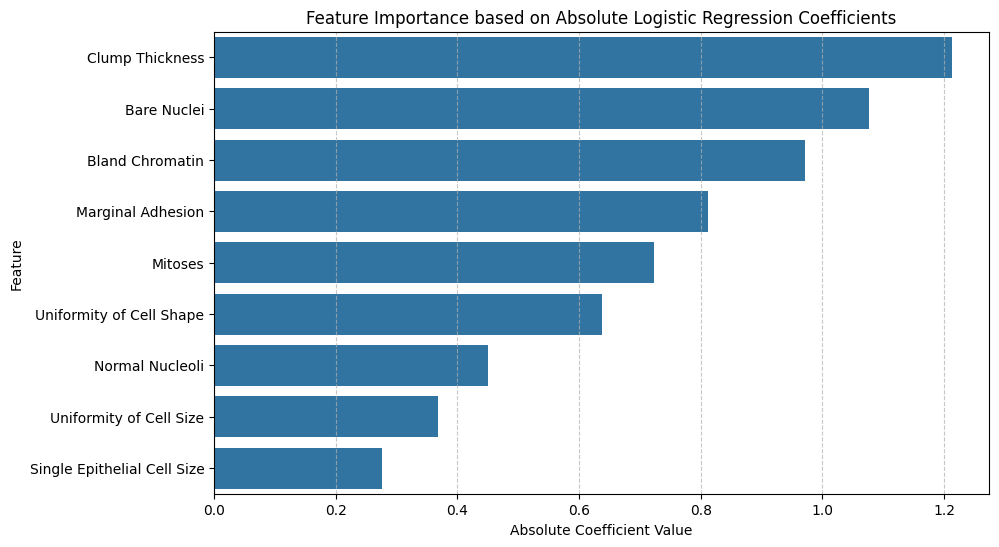

In [ ]:
# 4 - 5
# Get the coefficients and feature names
coefficients = logmodel.coef_[0]
feature_names = X.columns

# Create a DataFrame to easily view coefficients
coeff_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort by the absolute value of coefficients to find the most impactful features
coeff_df['Abs_Coefficient'] = np.abs(coeff_df['Coefficient'])
coeff_df_sorted = coeff_df.sort_values(by='Abs_Coefficient', ascending=False)

print("\n--- Feature Coefficients (Sorted by Absolute Value) ---")
print(coeff_df_sorted.to_markdown(index=False, numalign="left", stralign="left"))

print("\nBased on the absolute values of the coefficients, the two variables that can highly predict the 'Class' (Outcome Prediction) are:")
print(f"1. {coeff_df_sorted.iloc[0]['Feature']} (Coefficient: {coeff_df_sorted.iloc[0]['Coefficient']:.4f})")
print(f"2. {coeff_df_sorted.iloc[1]['Feature']} (Coefficient: {coeff_df_sorted.iloc[1]['Coefficient']:.4f})")

plt.figure(figsize=(10, 6))
sns.barplot(x='Abs_Coefficient', y='Feature', data=coeff_df_sorted)
plt.title('Feature Importance based on Absolute Logistic Regression Coefficients')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()